In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import cv2
import matplotlib.pyplot as plt

In [17]:
# Reading image with OpenCV library
# In this way image is opened already as numpy array
# WARNING! OpenCV by default reads images in BGR format
image_BGR = cv2.imread("D:\\obj_detection\\test_zip\\test\\apple_91.jpg")

# Showing image shape
print('Image shape:', image_BGR.shape)  # tuple of (800, 1360, 3)

# Getting spatial dimension of input image
h, w = image_BGR.shape[:2]  # Slicing from tuple only first two elements

# Showing height an width of image
print('Image height={0} and width={1}'.format(h, w))  # 800 1360


Image shape: (573, 960, 3)
Image height=573 and width=960


In [18]:
with open("D:\\obj_detection\\test_zip\\test\\yolo\\apple_91.txt") as f:
    # Preparing list for annotation of BB (bounding boxes)
    lst = []
    for line in f:
        lst += [line.rstrip()]
        print(line)

# Going through all BB
for i in range(len(lst)):
    # Getting current bounding box coordinates, its width and height
    bb_current = lst[i].split()
    x_center, y_center = int(float(bb_current[1]) * w), int(float(bb_current[2]) * h)
    box_width, box_height = int(float(bb_current[3]) * w), int(float(bb_current[4]) * h)
    
    # Now, from YOLO data format, we can get top left corner coordinates
    # that are x_min and y_min
    x_min = int(x_center - (box_width / 2))
    y_min = int(y_center - (box_height / 2))

    # Drawing bounding box on the original image
    cv2.rectangle(image_BGR, (x_min, y_min), (x_min + box_width, y_min + box_height), [172 , 10, 127], 2)

    # Preparing text with label and confidence for current bounding box
    class_current = 'Class: {}'.format(bb_current[0])
# Putting text with label and confidence on the original image
    cv2.putText(image_BGR, class_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_COMPLEX, 0.7, [172 , 10, 127], 2)


0 0.4937499948567709 0.488656186934447 0.5166666612847223 0.764397892418885



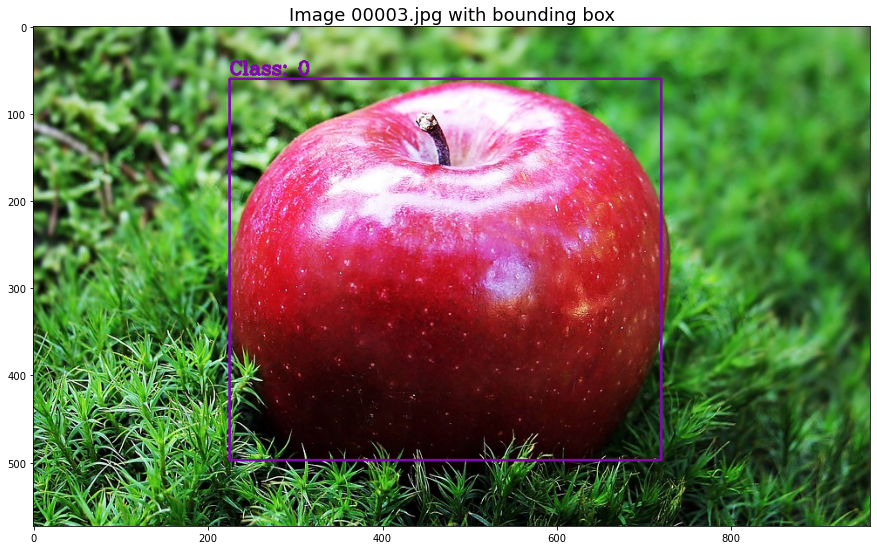

In [26]:
%matplotlib inline

# Plotting this example
# Setting default size of the plot
plt.rcParams['figure.figsize'] = (15, 15)

# Initializing the plot
fig = plt.figure()

# plt.figure(x_center, y_center,box_width, box_height,x_min,y_min)

plt.imshow(cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB))
plt.axis()
plt.title('Image 00003.jpg with bounding box', fontsize=18)
# Showing the plot
plt.show()

# Saving the plot
fig.savefig('example.png')
plt.close()
